# Dynamics Homework 4

Liam Dubay

March 24, 2021

## Part 1

### (a)

Importing the 3349 stars from the Besancon catalogue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1647876083.448151.resu', sep='\s+', header=86, skipfooter=6)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dist    3349 non-null   float64
 1   Mv      3349 non-null   float64
 2   CL      3349 non-null   int64  
 3   Typ     3349 non-null   float64
 4   LTef    3349 non-null   float64
 5   logg    3349 non-null   float64
 6   Age     3349 non-null   int64  
 7   Mass    3349 non-null   float64
 8   B-V     3349 non-null   float64
 9   U-B     3349 non-null   float64
 10  V-I     3349 non-null   float64
 11  V-K     3349 non-null   float64
 12  V       3349 non-null   float64
 13  mux     3349 non-null   float64
 14  muy     3349 non-null   float64
 15  Vr      3349 non-null   float64
 16  UU      3349 non-null   float64
 17  VV      3349 non-null   float64
 18  WW      3349 non-null   float64
 19  [Fe/H]  3349 non-null   float64
 20  l       3349 non-null   float64
 21  b       3349 non-null   float64
 22  

C:\Users\dubay.11\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


### (b)

In [3]:
saturated = df[df['V'] < 19]
print(saturated[['Dist', 'Mass']])

        Dist  Mass
0      0.052  0.31
2      0.071  0.69
3      0.091  0.33
4      0.091  0.40
5      0.117  0.32
...      ...   ...
1047   9.885  0.82
1127  13.735  0.82
1345  21.635  0.82
1521  26.835  0.82
1933  44.485  0.82

[229 rows x 2 columns]


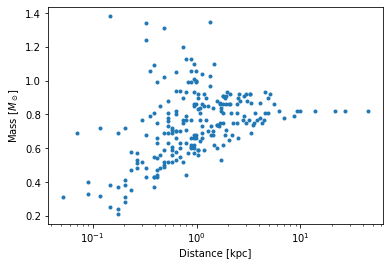

In [4]:
plt.scatter(saturated['Dist'], saturated['Mass'], s=9)
plt.xlabel('Distance [kpc]')
plt.xscale('log')
plt.ylabel(r'Mass [$M_\odot$]')
plt.show()

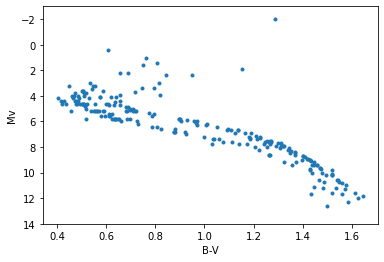

In [5]:
plt.scatter(saturated['B-V'], saturated['Mv'], s=9)
plt.xlabel('B-V')
plt.ylabel('Mv')
plt.ylim((14, -3))
plt.show()

There are 229 saturated stars. Most of the saturated stars are main sequence. There's also a bimodality to the main sequence, which originally I was going to attribute to binaries, but upon further reflection I now think is due to metallicity since I doubt this code does binary population synthesis. A majority have distances $\lesssim 3$ kpc so are probably from the disc. This seems to imply that most of the saturated stars are low-mass, nearby stars.

### (c)

The Gaia uncertainty of 3 mas/yr is 0.3 "/cen in the Besancon model. There are 117 stars with proper motions higher than this limit.

In [6]:
speedy = df[(df['V'] > 20) & (df['V'] <= 21) & (np.sqrt(df['mux']**2+df['muy']**2)>0.3)]
print(speedy)

        Dist    Mv  CL   Typ   LTef  logg  Age  Mass    B-V    U-B  ...  \
8      0.147  15.0   5  7.74  3.469  5.10    7  0.12  1.889  1.632  ...   
20     0.176  14.6   6  9.00  3.741  8.00    2  0.60  0.633 -0.181  ...   
33     0.236  13.8   5  7.65  3.492  5.05    7  0.17  1.978  1.568  ...   
34     0.236  13.7   5  7.65  3.493  5.00    6  0.17  1.751  1.439  ...   
41     0.266  13.6   5  7.65  3.495  5.00    7  0.18  1.711  1.387  ...   
...      ...   ...  ..   ...    ...   ...  ...   ...    ...    ...  ...   
1251  17.985   3.8   4  4.34  3.809  4.12    9  0.80  0.403 -0.216  ...   
1271  18.735   3.6   4  4.43  3.801  4.01    9  0.81  0.436 -0.155  ...   
1273  18.785   4.0   5  4.48  3.812  4.21    9  0.80  0.399 -0.213  ...   
1293  19.535   3.8   4  4.34  3.809  4.12    9  0.80  0.404 -0.206  ...   
1486  25.635   3.8   4  4.34  3.809  4.12    9  0.80  0.404 -0.201  ...   

        muy      Vr      UU      VV      WW  [Fe/H]      l     b     Av  \
8    -8.208   20.09  -31

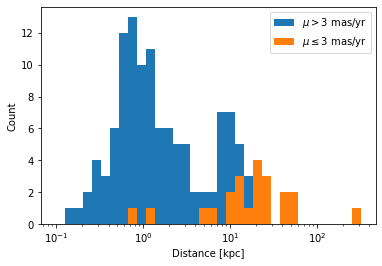

In [7]:
slow = df[(df['V'] > 20) & (df['V'] <= 21) & (np.sqrt(df['mux']**2+df['muy']**2)<=0.3)]
bins = np.logspace(-1, 2.5, 35)
plt.hist(speedy['Dist'], bins=bins, label=r'$\mu>3$ mas/yr')
plt.hist(slow['Dist'], bins=bins, label=r'$\mu\leq3$ mas/yr')
plt.xlabel('Distance [kpc]')
plt.xscale('log')
plt.ylabel('Count')
plt.legend()
plt.show()

In [8]:
slow.shape[0]

22

There aren't many Milky Way stars with such small proper motions, and those that are under 3 mas/yr are generally quite far away from us, which makes sense.

### (d)

In [9]:
lowfe = df[df['[Fe/H]']<-2.5]
solar = df[(df['[Fe/H]']>-0.1) & (df['[Fe/H]']<0.1)]

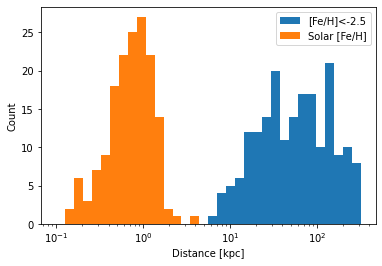

In [10]:
bins = np.logspace(-1, 2.5, 35)
plt.hist(lowfe['Dist'], label='[Fe/H]<-2.5', bins=bins)
plt.hist(solar['Dist'], label='Solar [Fe/H]', bins=bins)
plt.xlabel('Distance [kpc]')
plt.xscale('log')
plt.ylabel('Count')
plt.legend()
plt.show()

The lowest metallicity stars are all very far away, suggesting that they exist almost entirely in the halo population. Meanwhile, the solar metallicity stars are much closer, lying almost entirely within the disc.

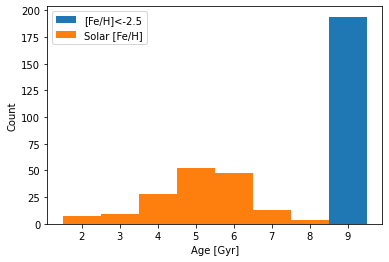

In [11]:
bins = np.linspace(1.5, 9.5, 9)
plt.hist(lowfe['Age'], bins=bins, label='[Fe/H]<-2.5')
plt.hist(solar['Age'], bins=bins, label='Solar [Fe/H]')
plt.xlabel('Age [Gyr]')
plt.ylabel('Count')
plt.legend()
plt.show()

All of the lowest metallicity stars belong to the initial 9 Gyr old population. The solar-metallicity stars were in general born much more recently, but some of the second- and third-generation stars did end up with solar [Fe/H].

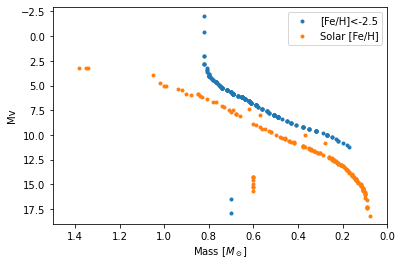

In [12]:
plt.scatter(lowfe['Mass'], lowfe['Mv'], s=9, label='[Fe/H]<-2.5')
plt.scatter(solar['Mass'], solar['Mv'], s=9, label='Solar [Fe/H]')
plt.xlabel(r'Mass [$M_\odot$]')
plt.xlim((1.5, 0))
plt.ylabel('Mv')
plt.ylim((19, -3))
plt.legend()
plt.show()

The two groups occupy parallel main sequence tracks. The low-metallicity stars above 0.8 solar masses have already evolved through the red giant phase and are now white dwarfs at the bottom of the plot.

### (e)

I chose to investigate the metallicity distribution functions (MDF) for disc stars (defined as distance < 3 kpc) and halo stars (distance > 3 kpc). MDFs are useful because they are readily observable using modern chemical abundance surveys, and they show the effects of different evolutionary processes. Here we can see that the disc and halo stars' MDFs are quite different. Disc stars have a median [Fe/H] close to solar, while halo stars are much lower metallicity. Halo stars also have a larger, more symmetrical spread in [Fe/H], while the disc stars have a narrower distribution but also include a long tail to lower metallicity. This indicates halo stars represent a much older population, and while disc stars are primarily younger they do include some old stars as well.

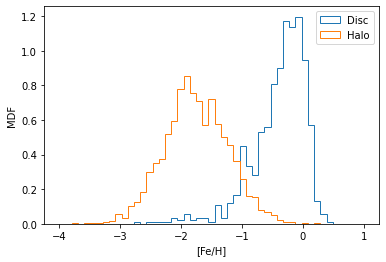

In [13]:
disc = df[df['Dist'] < 3]
halo = df[df['Dist'] >= 3]
bins = np.linspace(-4, 1, 50)
plt.hist(disc['[Fe/H]'], histtype='step', density=True, bins=bins, label='Disc')
plt.hist(halo['[Fe/H]'], histtype='step', density=True, bins=bins, label='Halo')
plt.xlabel('[Fe/H]')
plt.ylabel('MDF')
plt.legend()
plt.show()

## Part 2

### (a)

In [2]:
from galpy.potential import NFWPotential, HernquistPotential, plotRotcurve, DoubleExponentialDiskPotential
from astropy import units as u

M31 observational data from Table 1 in Seigar et al. (2008).

In [3]:
m31 = {
    'Re': 1.9*u.kpc,
    'n': 1.7,
    'h': 5.9*u.kpc,
    'Ldisk': 6.0e10*u.Lsun,
    'MDM': 2e12*u.Msun,
    'conc': 20,
    'B/D': 0.57,
    'M/L': 1.15*u.Msun/u.Lsun,
    'hz': 0.5*u.kpc,
    'Mbulge': 3.5e10*u.Msun,
}

In [7]:
bulge = HernquistPotential(amp=2*m31['Mbulge'], a=m31['Re'])
disk_amp = m31['M/L'] * m31['Ldisk'] / (4 * np.pi * m31['h']**2 * m31['hz'])
disk = DoubleExponentialDiskPotential(amp=disk_amp, hr=m31['h'], hz=m31['hz'])
halo = NFWPotential(mvir=2, conc=20, amp=2e12*u.Msun)
potential = bulge + disk + halo

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:15: RuntimeWarning: overflow encountered in sinh
  return (numpy.sinh(numpy.pi*numpy.sinh(t))

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:16: RuntimeWarning: overflow encountered in cosh
  +numpy.pi*t*numpy.cosh(t))/(numpy.cosh(numpy.pi*numpy.sinh(t))+1)

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:15: RuntimeWarning: invalid value encountered in true_divide
  return (numpy.sinh(numpy.pi*numpy.sinh(t))



The mass of the disk, for the purposes of calculating the average density, can be found by integrating the double exponential disk potential:

$$
M = 2\int_0^{2\pi}\int_0^\infty\int_0^\infty \exp(-R/h_R - z/h_z) R dR dz d\phi
= 4\pi h_R^2 h_z
$$

so the amplitude for the double exponential disk profile is

$$
\frac{(M/L)(L_{\rm{disk}})}{4\pi h_R^2 h_z}
$$

In [8]:
disk_amp

<Quantity 3.15475182e+08 solMass / kpc3>

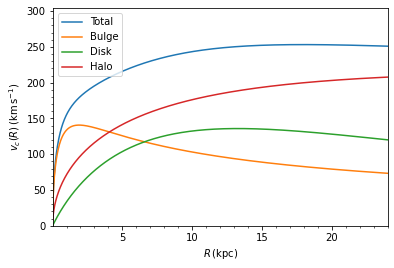

In [9]:
plotRotcurve(potential, Rrange=[0.01, 24], grid=1001, label='Total')
bulge.plotRotcurve( Rrange=[0.01, 24], grid=1001, overplot=True, label='Bulge')
disk.plotRotcurve(Rrange=[0.01, 24], grid=1001, overplot=True, label='Disk')
halo.plotRotcurve(Rrange=[0.01, 24], grid=1001, overplot=True, label='Halo')
plt.legend()
plt.show()

The total velocity curve looks ok, but I'm concerned by the halo being so dominant over the disk at all radii. I would have expected to see a range of radii where the disk dominates over the halo. So, for absolutely no scientific reason, I doubled the amplitude of the disk and halved the mass of the halo.

In [16]:
bulge = HernquistPotential(amp=2*m31['Mbulge'], a=m31['Re'])
disk_amp = m31['M/L'] * m31['Ldisk'] / (2 * np.pi * m31['h']**2 * m31['hz'])
disk = DoubleExponentialDiskPotential(amp=disk_amp, hr=m31['h'], hz=m31['hz'])
halo = NFWPotential(mvir=1, conc=20, amp=1e12*u.Msun)
potential = bulge + disk + halo

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:15: RuntimeWarning: overflow encountered in sinh
  return (numpy.sinh(numpy.pi*numpy.sinh(t))

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:16: RuntimeWarning: overflow encountered in cosh
  +numpy.pi*t*numpy.cosh(t))/(numpy.cosh(numpy.pi*numpy.sinh(t))+1)

C:\Users\dubay.11\Anaconda3\lib\site-packages\galpy\potential\DoubleExponentialDiskPotential.py:15: RuntimeWarning: invalid value encountered in true_divide
  return (numpy.sinh(numpy.pi*numpy.sinh(t))



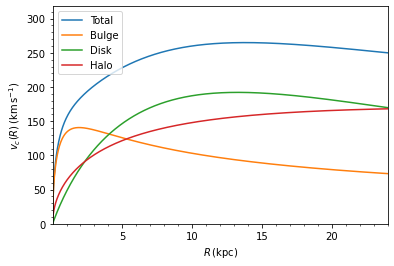

In [17]:
plotRotcurve(potential, Rrange=[0.01, 24], grid=1001, label='Total')
bulge.plotRotcurve( Rrange=[0.01, 24], grid=1001, overplot=True, label='Bulge')
disk.plotRotcurve(Rrange=[0.01, 24], grid=1001, overplot=True, label='Disk')
halo.plotRotcurve(Rrange=[0.01, 24], grid=1001, overplot=True, label='Halo')
plt.legend()
plt.show()

I've assumed a disk scale height of 0.5 kpc, which is a little bigger than the thick disk scale height in the Milky Way. Rubin & Ford (1970) report that 120 arcmin is equivalent to 24 kpc at the distance of Andromeda. The comparison to their paper isn't *great* because the central bump isn't reproduced at all, but at least my plot flattens out to around the same value that they get.

### (b)

Plotting test particle orbits in the Andromeda galaxy potential.

In [18]:
from galpy.orbit import Orbit
from galpy.potential import vcirc

In [19]:
Rs = np.array([1, 5, 20, 50]) * u.kpc
zs = np.array([1, 5, 20, 50]) * u.kpc
ts = np.linspace(0, 10, 10000) * u.Gyr

In [20]:
def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs = np.roll(zs,-1)
    indx =(zs[:-1]< 0.)*(shiftzs[:-1]> 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])

def plot_orbits(init, ts, potential):
    """Plot three panels for an orbit with given initial conditions, timestep, and potential"""
    o = Orbit(vxvv=[init['R'], init['vR'], init['vT'], init['z'], init['vz'], init['phi']])
    o.integrate(ts, potential, method='odeint')
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)
    # Orbit in R-z plane
    axs[0].plot(o.R(ts), o.z(ts))
    axs[0].set_xlabel('R (kpc)')
    axs[0].set_ylabel('z (kpc)')
    # Surface-of-section in R-vR plane
    sectR, sectvR = surface_section(o.R(ts), o.z(ts), o.vR(ts))
    axs[1].scatter(sectR, sectvR)
    axs[1].set_xlabel('R (kpc)')
    axs[1].set_ylabel('$v_R$ (km/s)')
    # Orbit in x-y plane
    axs[2].plot(o.x(ts), o.y(ts))
    axs[2].set_xlabel('x (kpc)')
    axs[2].set_ylabel('y (kpc)')
    fig.suptitle('R=%s, z=%s, $v_R$=%s' % (init['R'], init['z'], np.round(init['vR'], 2)))
    plt.show()

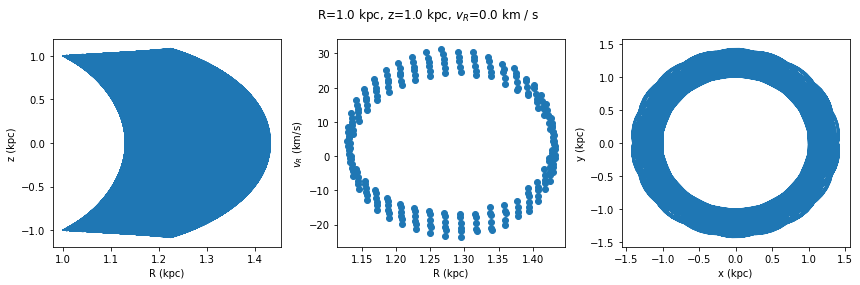

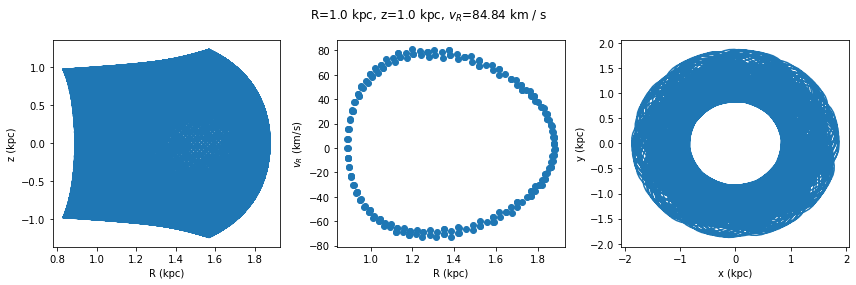

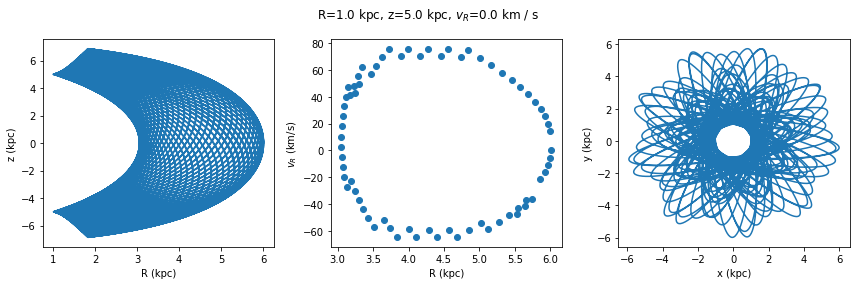

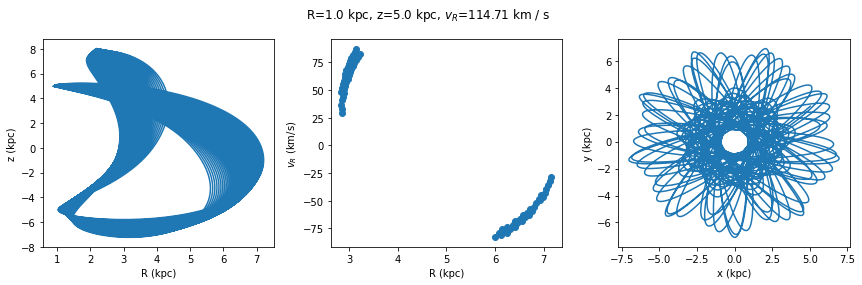

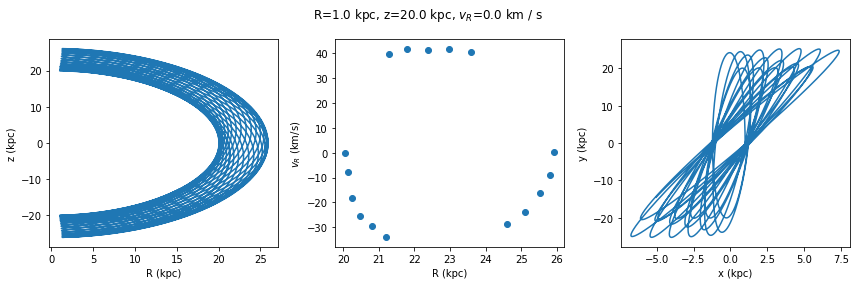

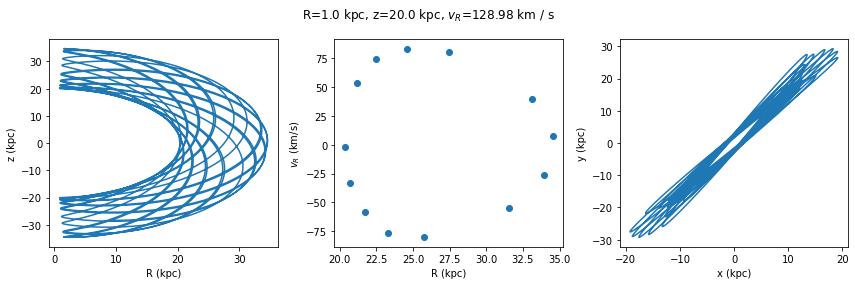

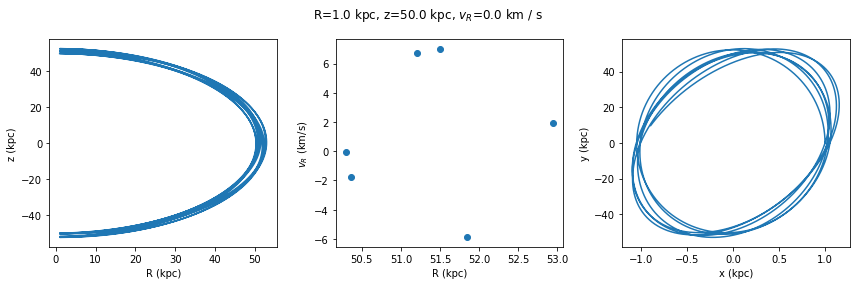

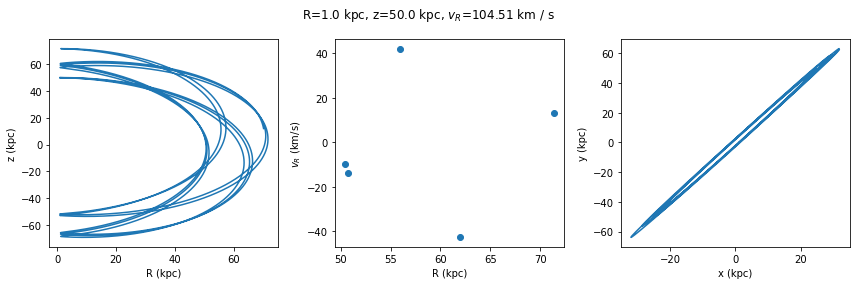

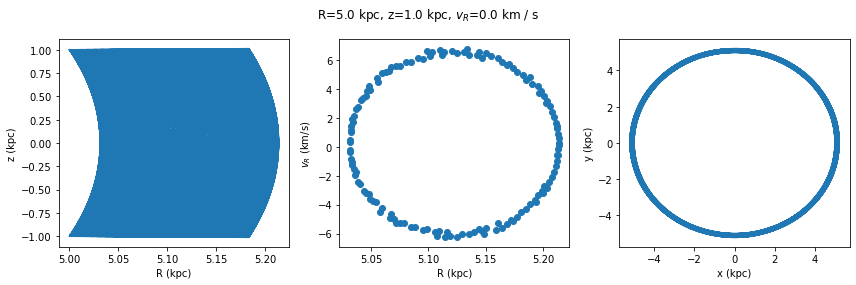

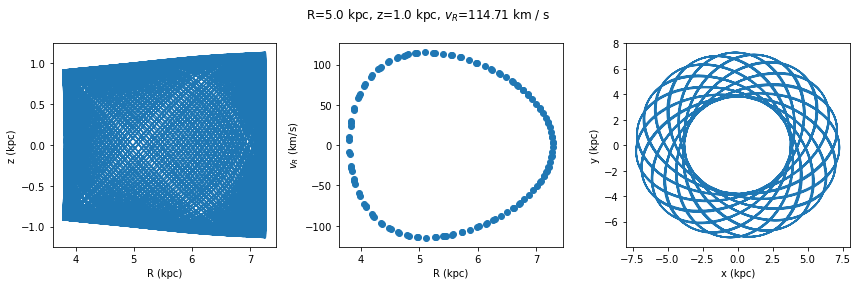

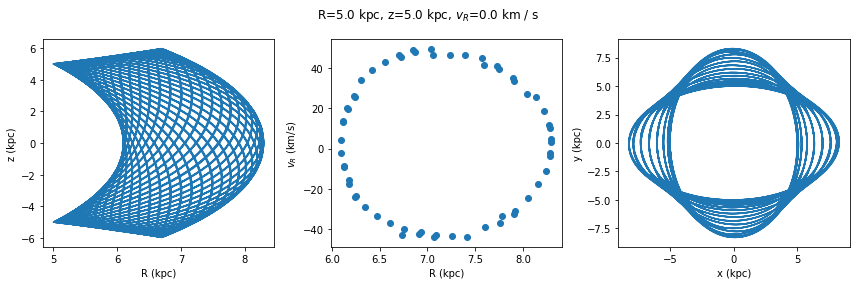

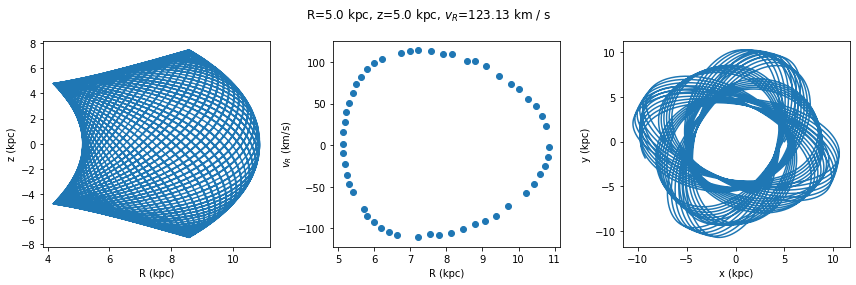

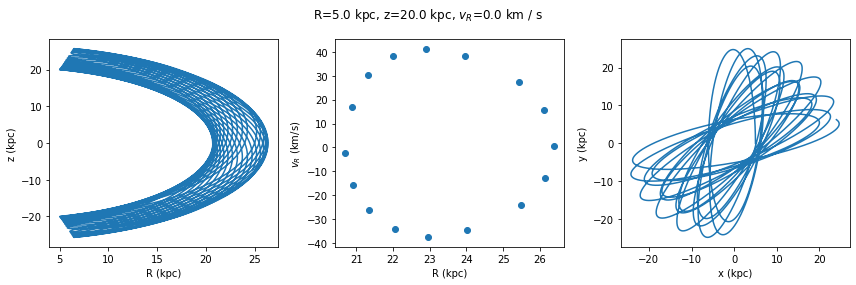

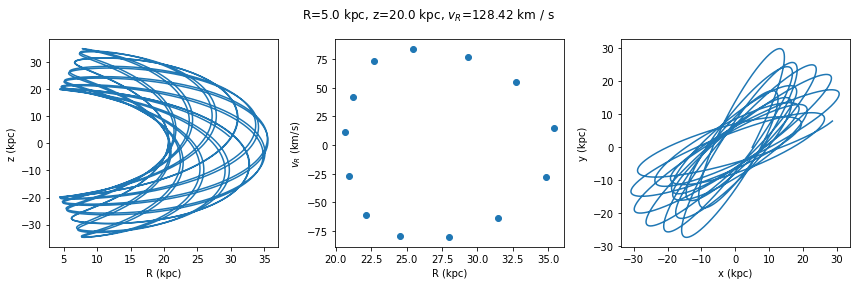

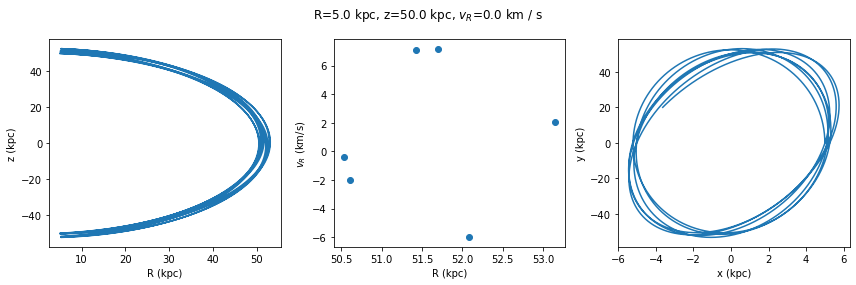

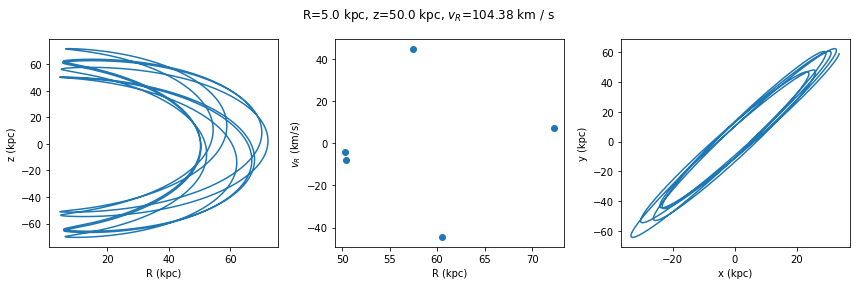

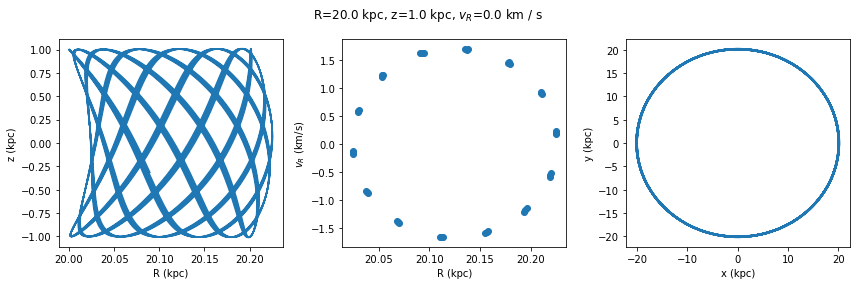

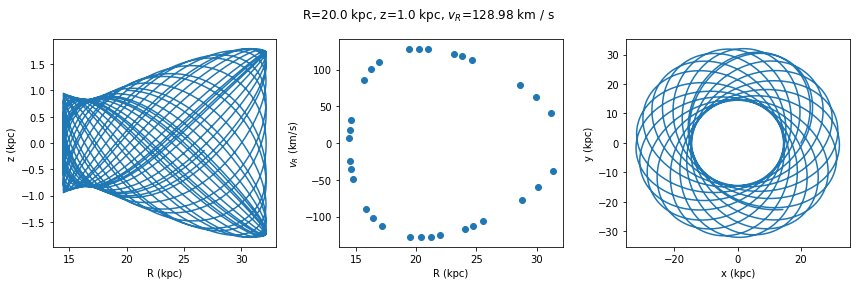

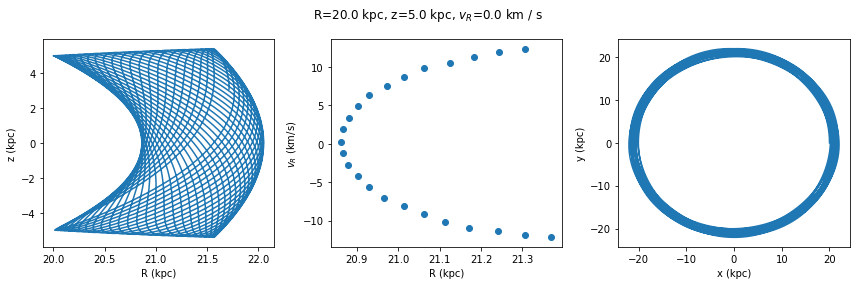

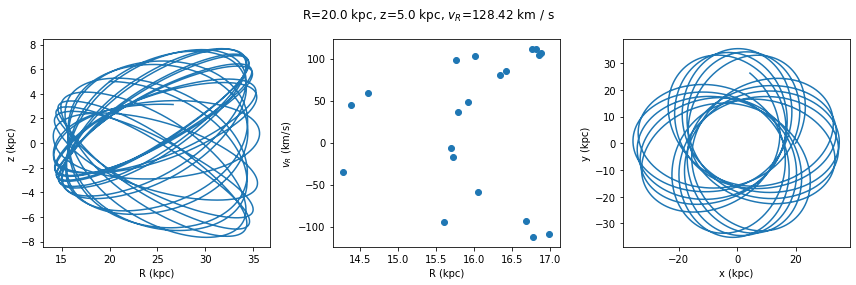

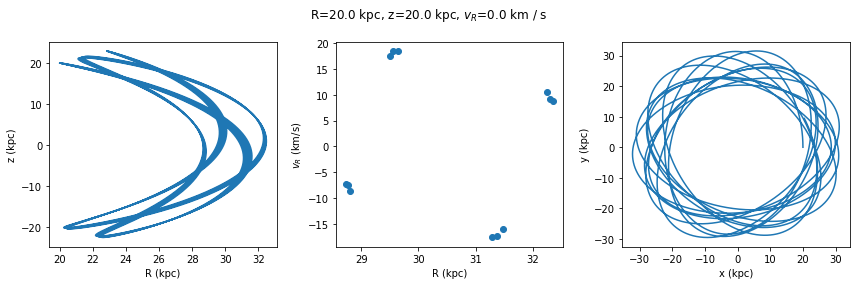

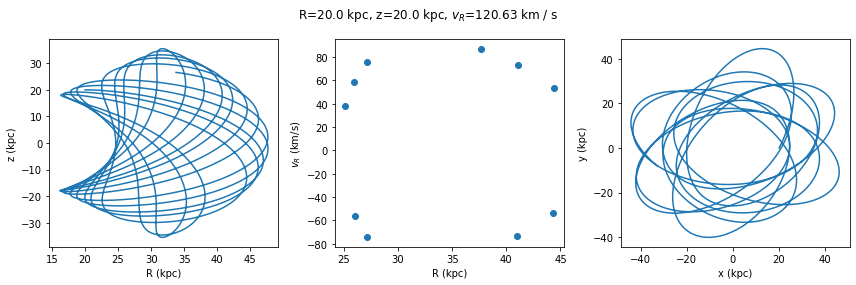

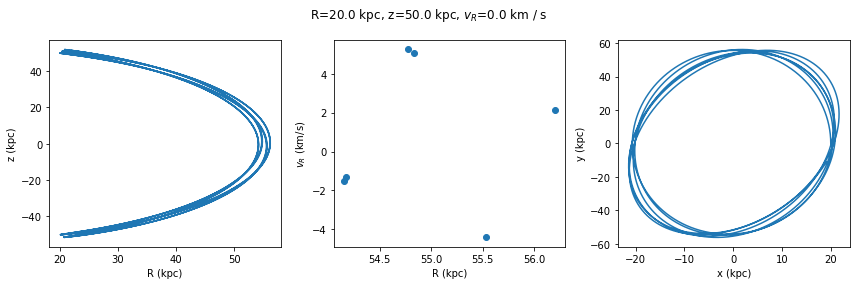

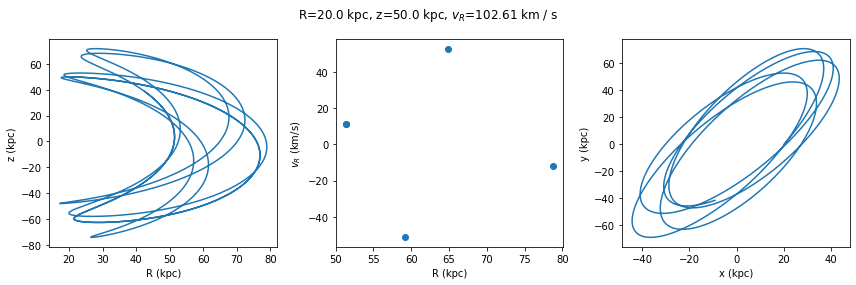

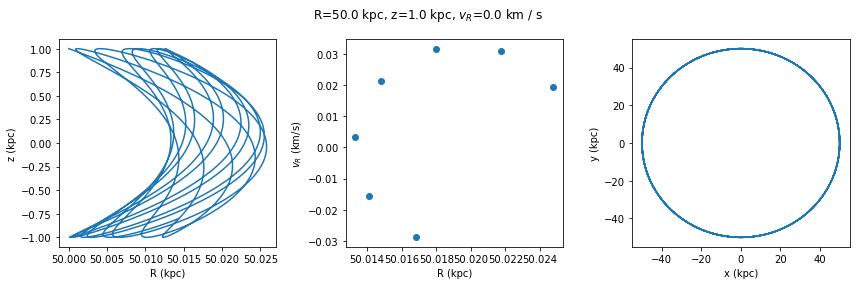

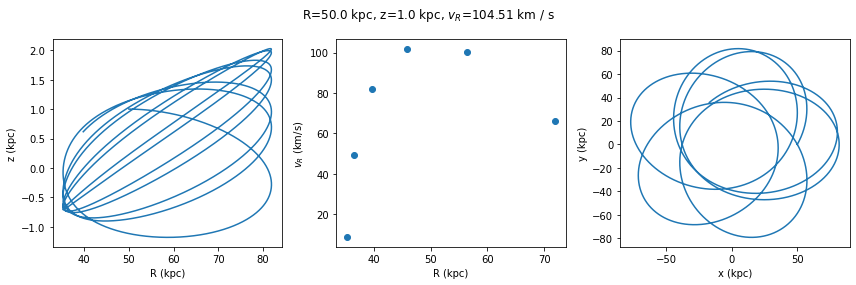

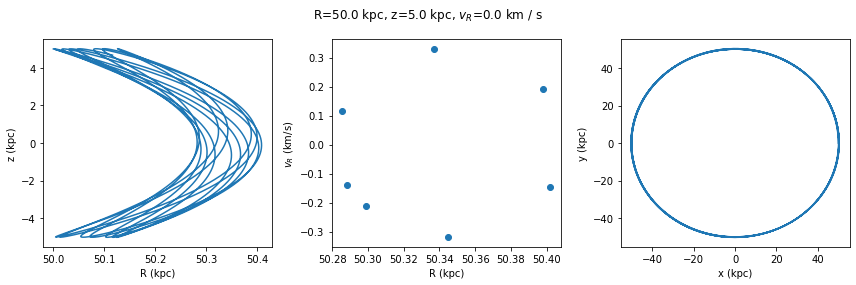

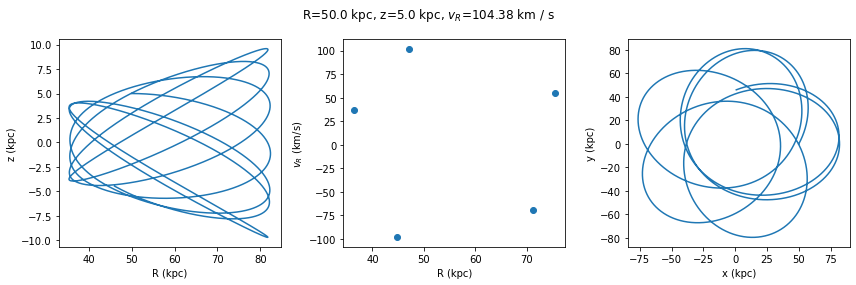

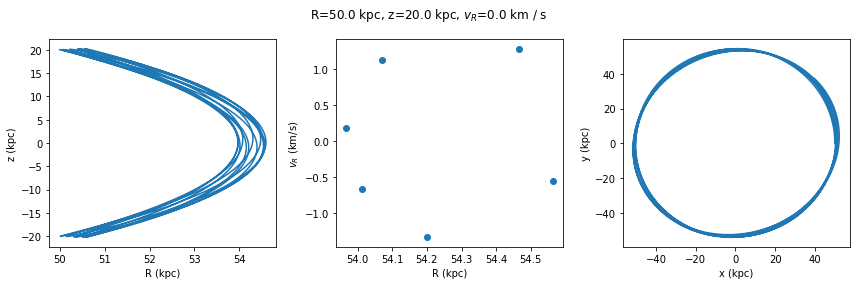

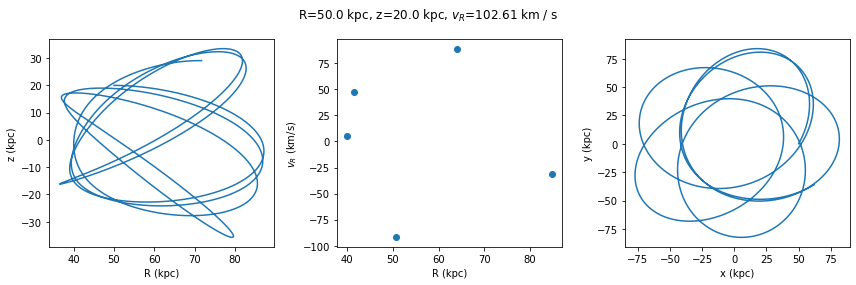

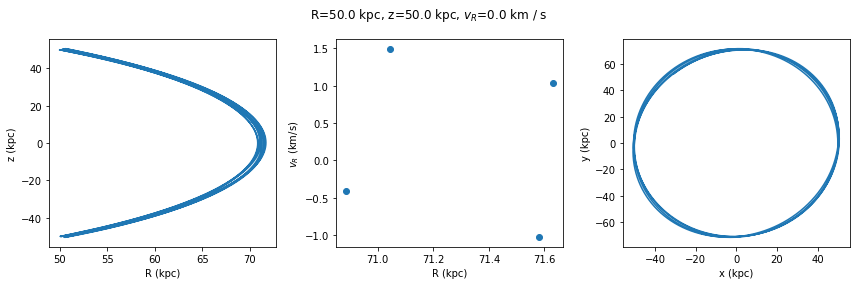

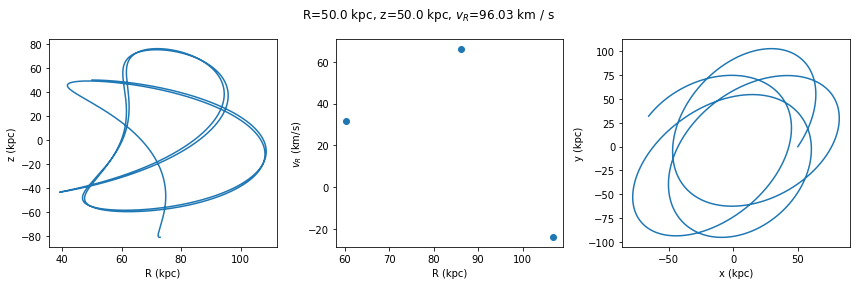

In [21]:
# Standard initial conditions
init = {
    'vz': 0*u.km/u.s,
    'phi': 0*u.rad
}
# Loop through values of R and z
for R in Rs:
    init['R'] = R
    for z in zs:
        init['z'] = z
        init['vT'] = vcirc(potential, np.sqrt(R**2+z**2)) * u.km/u.s
        # Circular-ish orbit
        init['vR'] = 0*u.km/u.s
        plot_orbits(init, ts, potential)
        # Eccentric orbit
        init['vR'] = 0.5*init['vT']
        plot_orbits(init, ts, potential)

In general, the eccentric orbits tend to have a much wider spread in $R$ and a larger distribution in the x-y plane. The surface-of-section plots for the circular orbits also tend to be more axisymmetric than the eccentric orbits, which have symmetry across the $v_R=0$ plane but not the $R=R_c$ plane. In the widest orbits (such as R=50 kpc, z=50 kpc), it is easiest to see that the circular orbits evolve much more slowly with time than the eccentric orbits.

### (c)

Same as (b) but with a triaxial NFW halo profile.

In [22]:
from galpy.potential import TriaxialNFWPotential
trihalo = TriaxialNFWPotential(mvir=2, conc=20, amp=2e12*u.Msun, a=0.2, b=1, c=0.7)
tripot = bulge + disk + trihalo

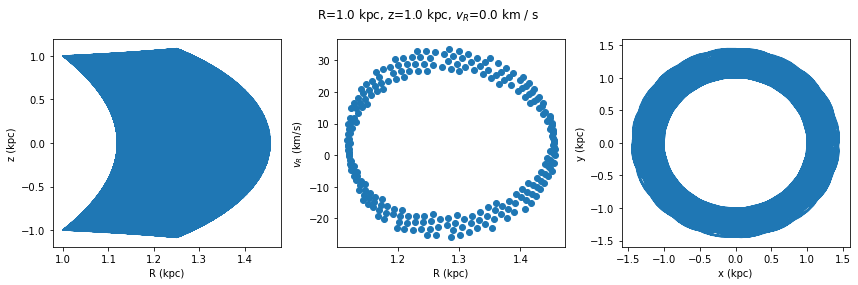

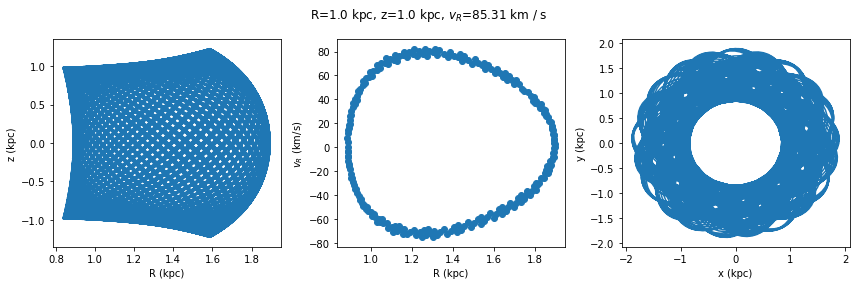

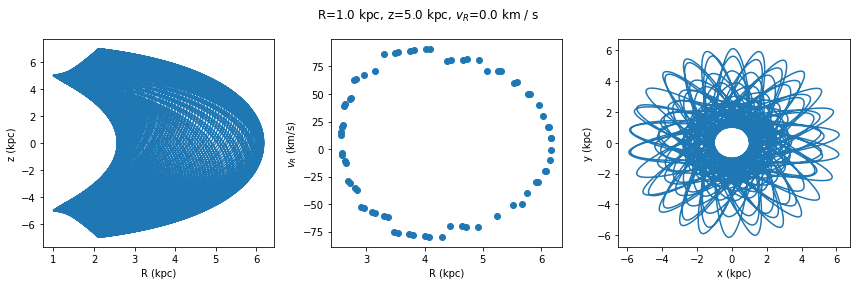

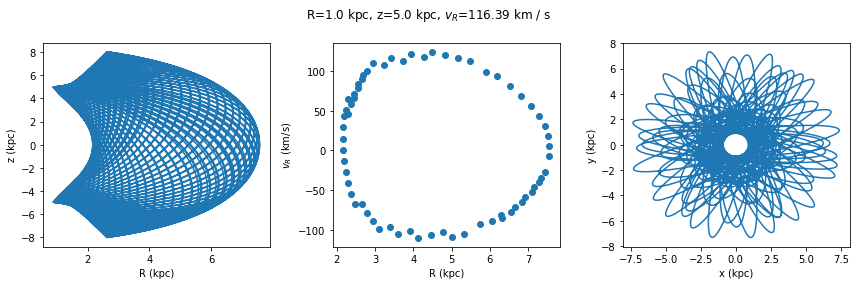

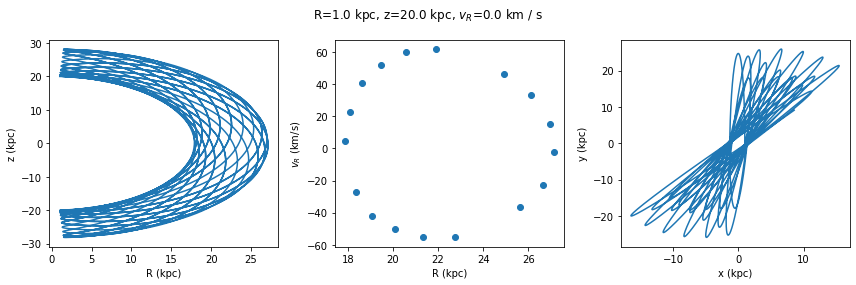

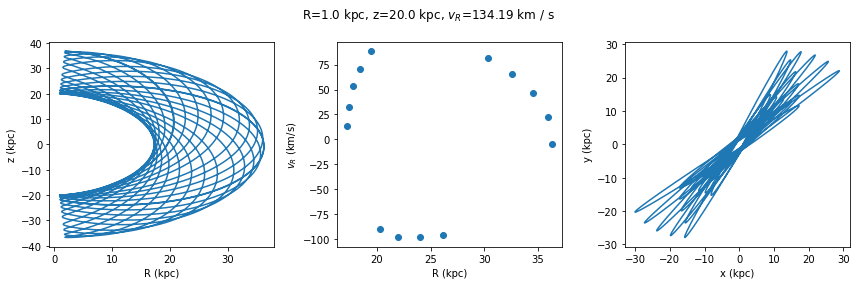

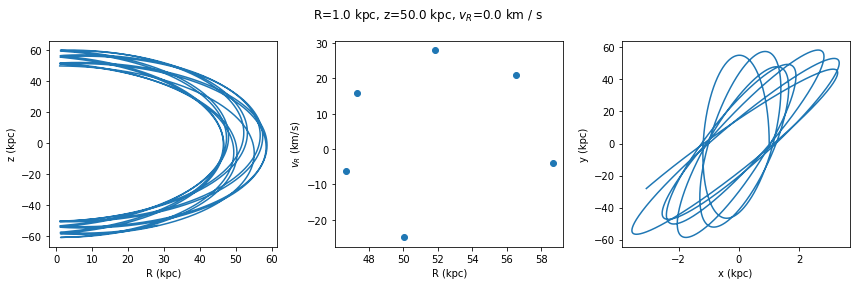

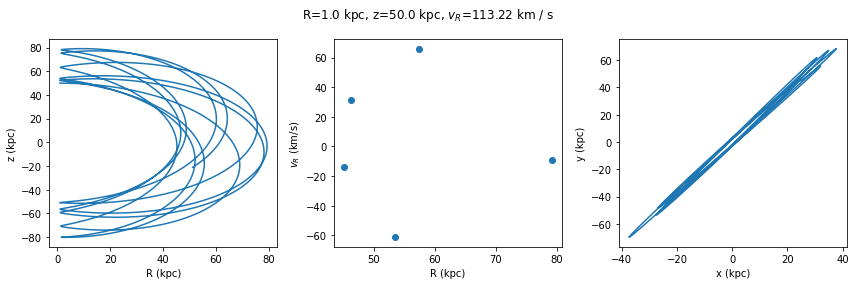

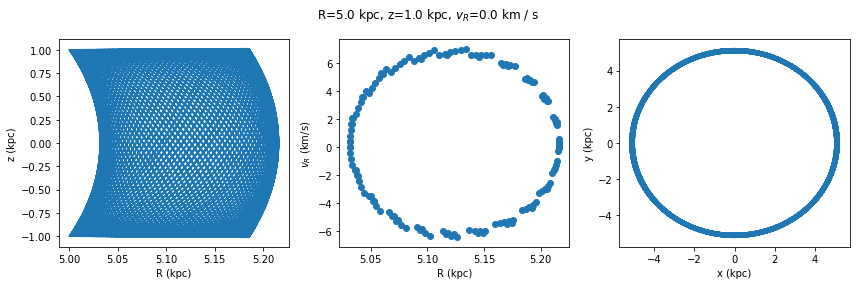

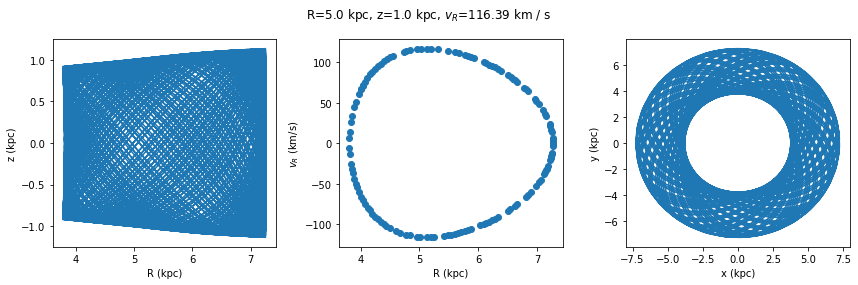

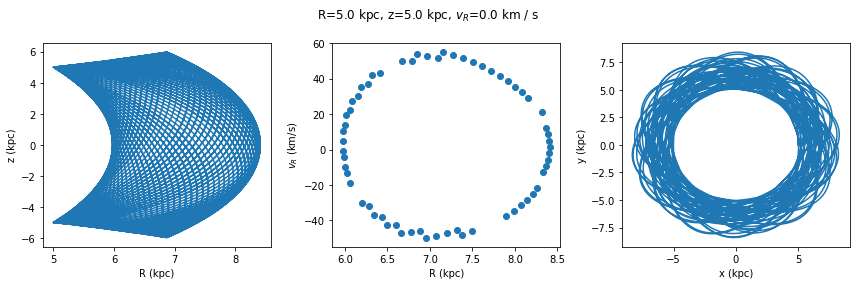

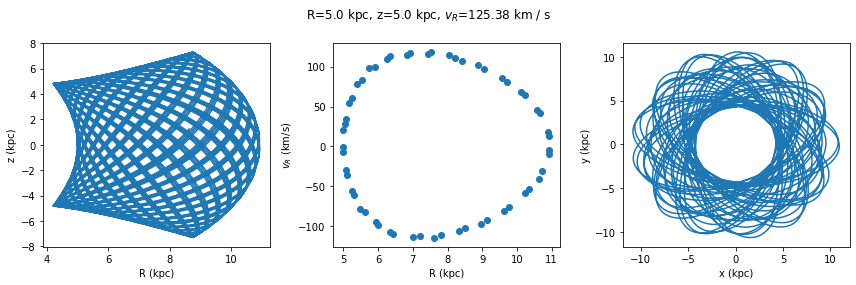

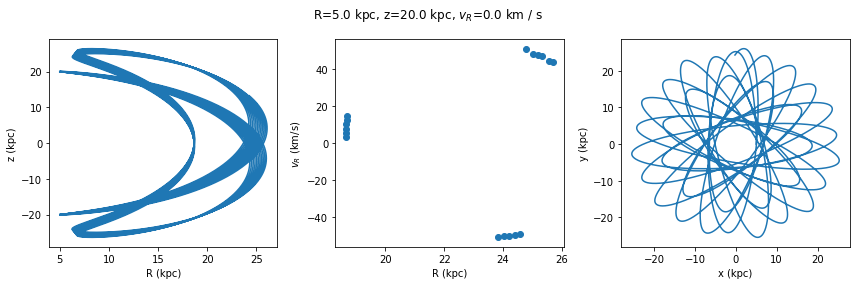

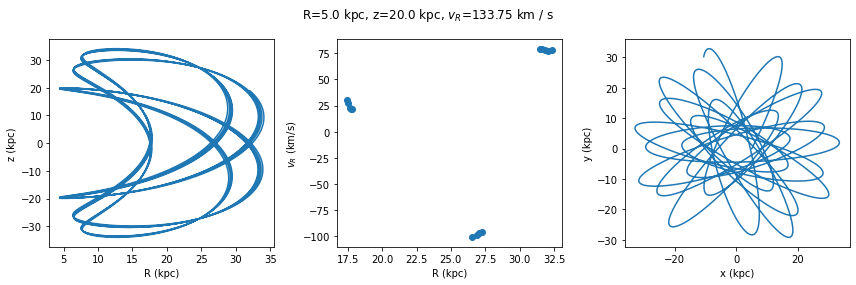

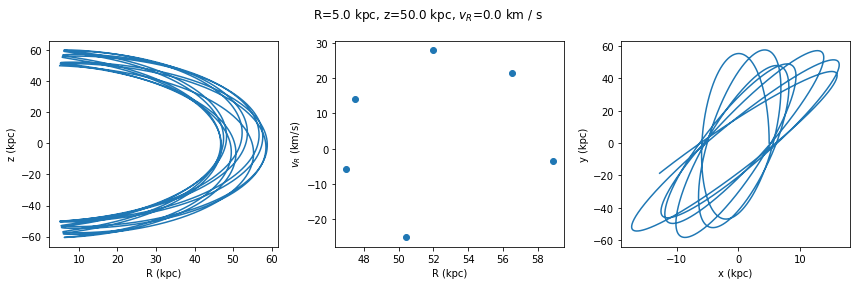

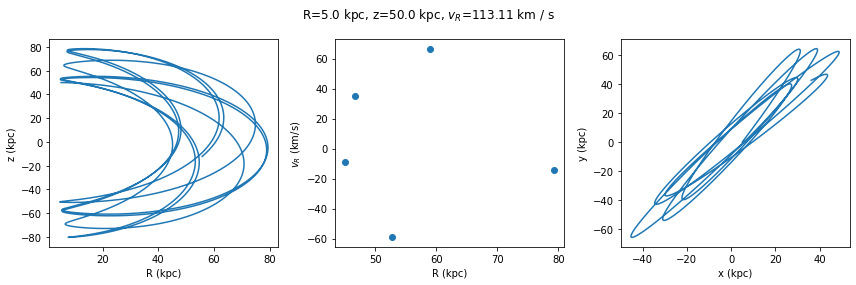

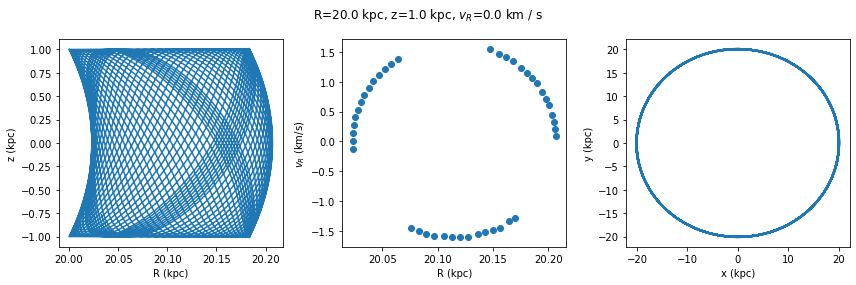

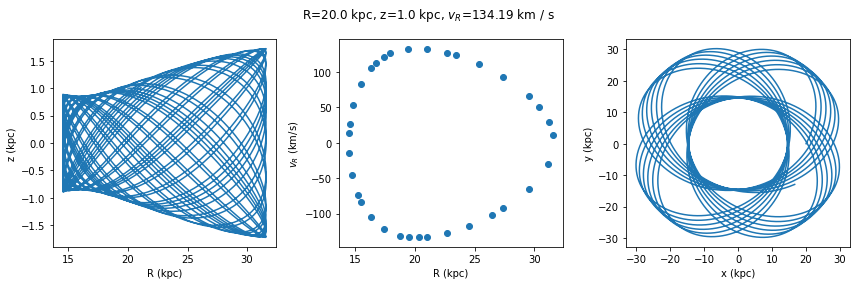

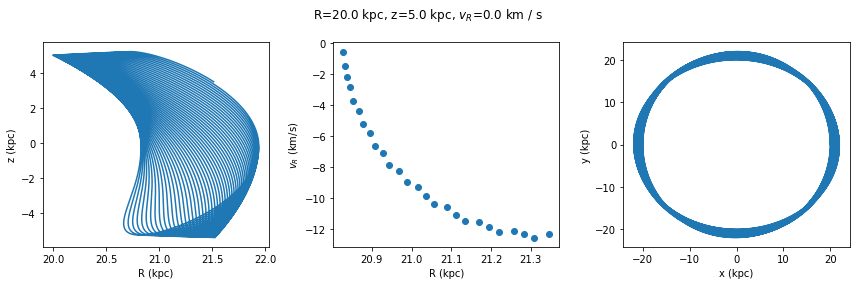

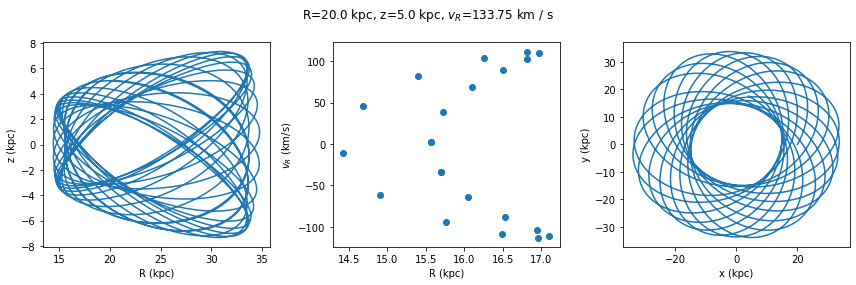

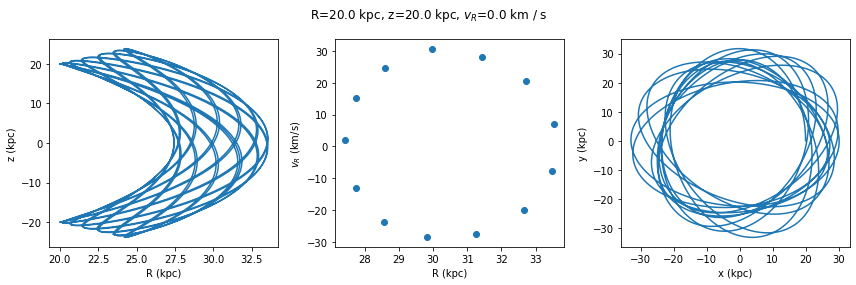

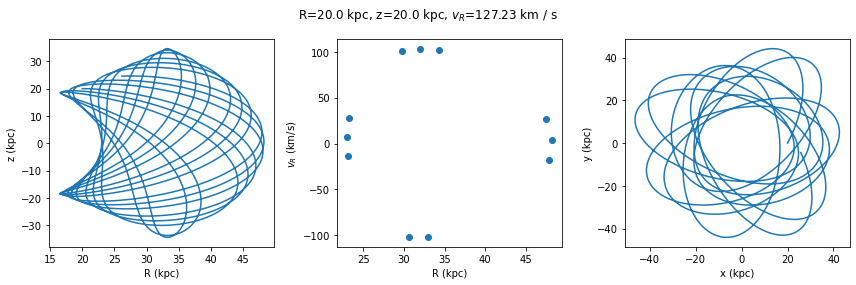

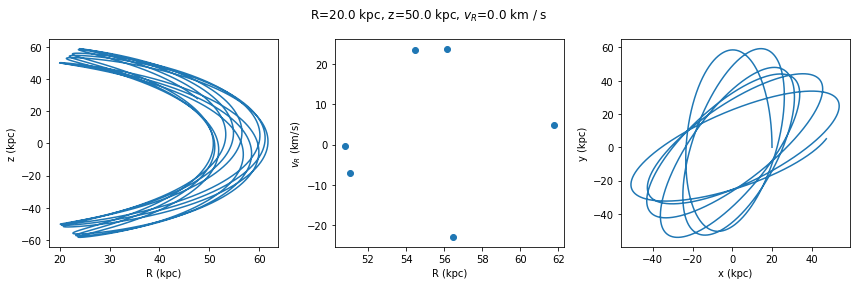

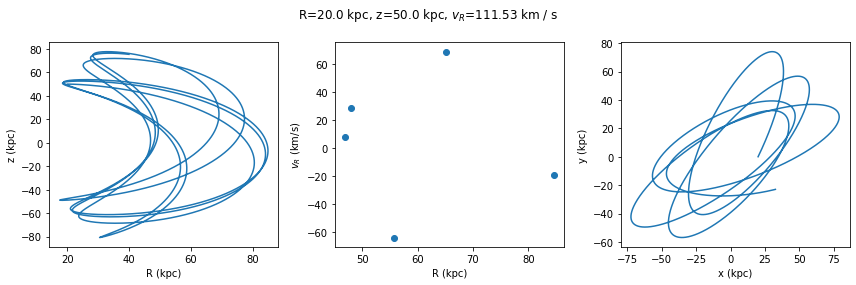

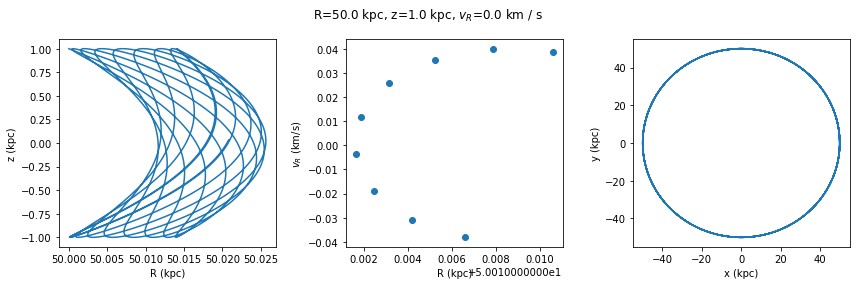

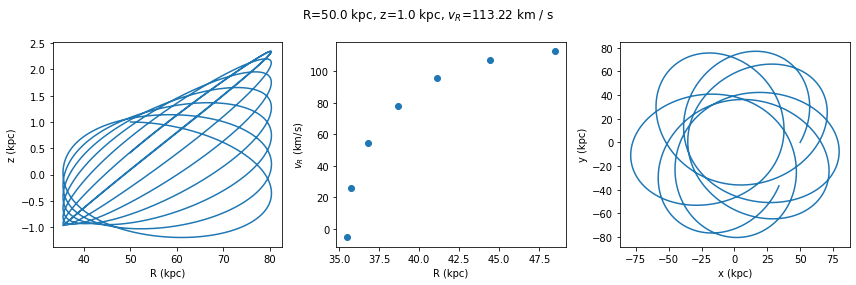

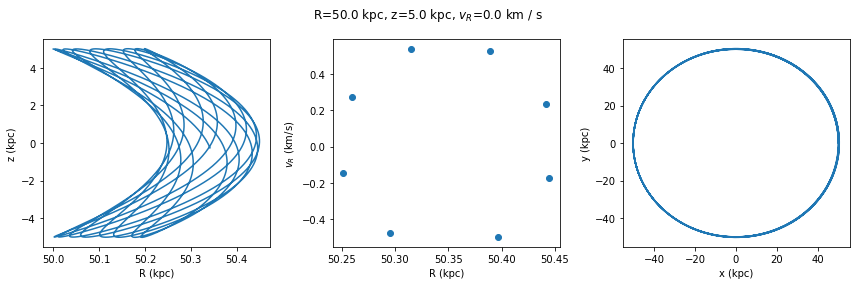

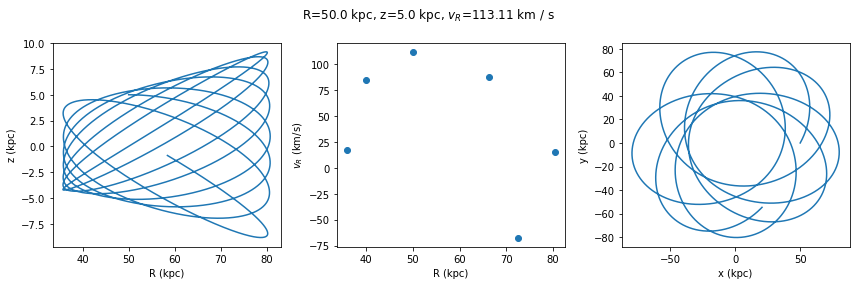

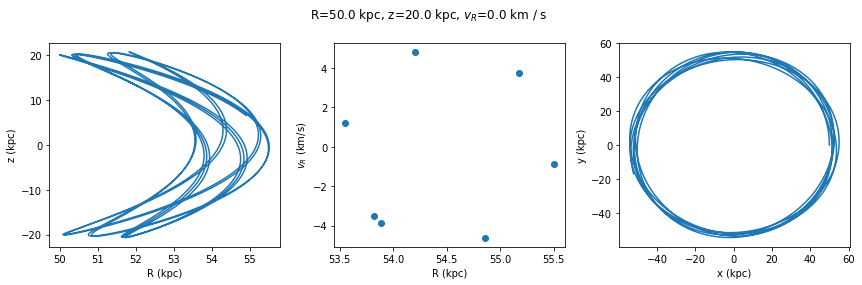

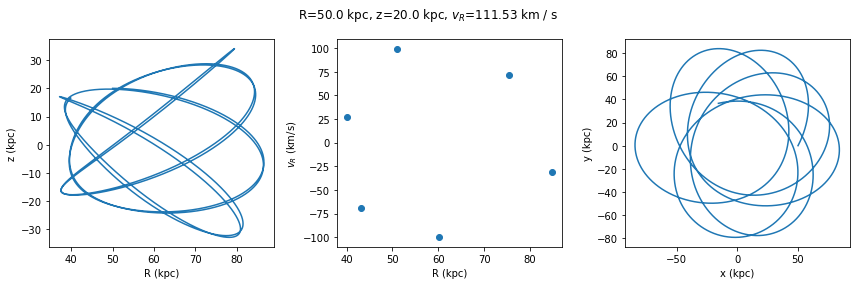

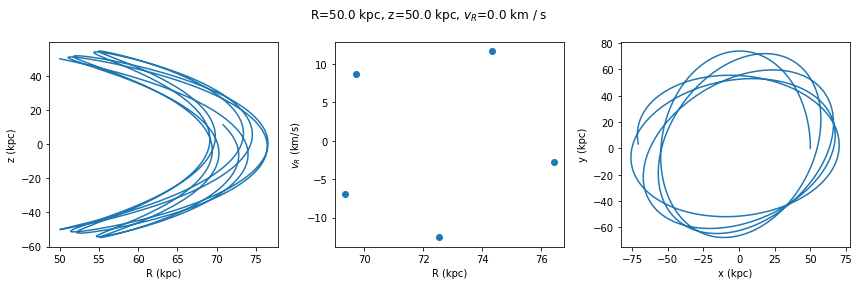

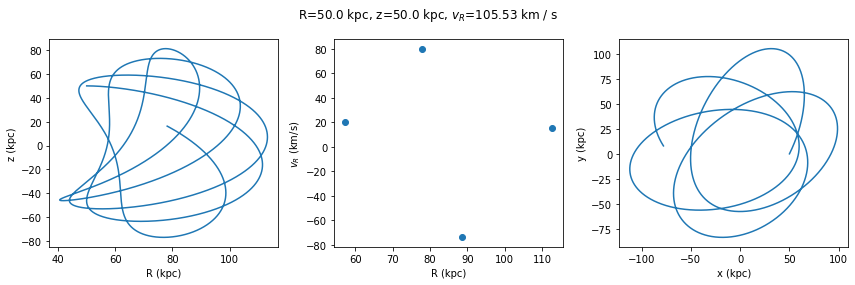

In [23]:
# Standard initial conditions
init = {
    'vz': 0*u.km/u.s,
    'phi': 0*u.rad
}
# Loop through values of R and z
for R in Rs:
    init['R'] = R
    for z in zs:
        init['z'] = z
        init['vT'] = vcirc(tripot, np.sqrt(R**2+z**2)) * u.km/u.s
        # Circular-ish orbit
        init['vR'] = 0*u.km/u.s
        plot_orbits(init, ts, tripot)
        # Eccentric orbit
        init['vR'] = 0.5*init['vT']
        plot_orbits(init, ts, tripot)

Orbits which stick to the galactic plane or bulge look very similar between the two cases - see the very first plot for an example. Orbits which reach out into the galay's halo start to precess much more in the triaxial profile than in the spherical profile. This can clearly be seen in the plots for R=20 kpc, z=20 kpc. In the spherical case, the particle sticks to mostly the same track in the z-R plane and precesses slowly in the x-y plane. In the triaxial case, variation in the z-R plane is substantial and the orbits in the x-y plane begin to look more boxy.